R-squared: 0.8802362672879432
Mean Squared Error: 0.013928244643037083


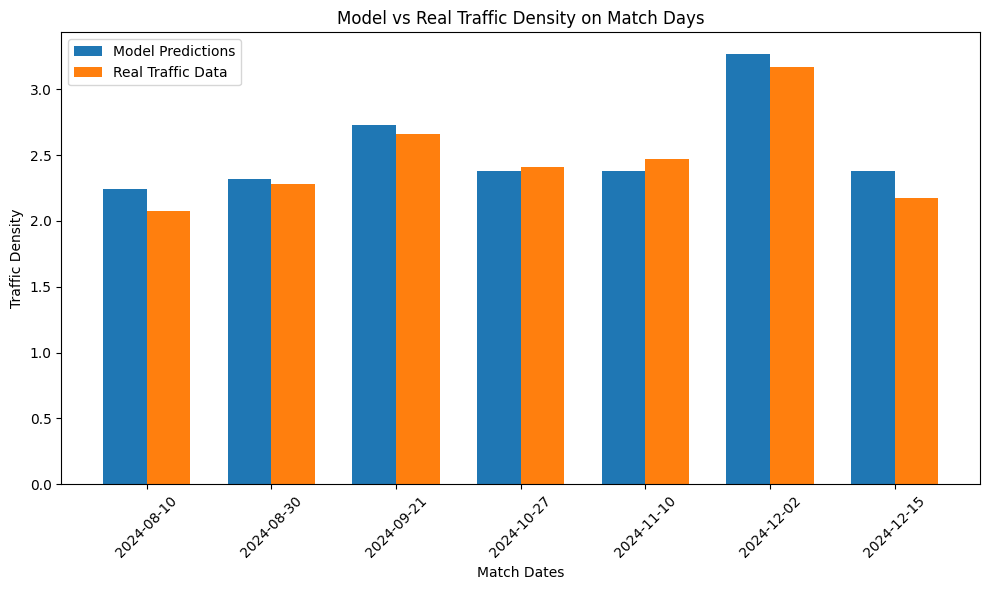

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Load traffic dataset
data_path = 'data/fenerbahce_stadium_area_10km.csv'
df = pd.read_csv(data_path)

# Load match days dataset
match_data_path = 'data/fbmatches.csv'
fb_matches = pd.read_csv(match_data_path)

# Convert date columns to datetime format
df['datetime'] = pd.to_datetime(df['DATE_TIME'])
fb_matches['match_date'] = pd.to_datetime(fb_matches['DATE'], dayfirst=True)

# Convert 'derby' column to binary
fb_matches['derby_binary'] = fb_matches['derby'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Manually define match times
manual_match_times = [21.75, 21, 20, 19, 19, 20, 19]  # Hours in decimal format (e.g., 21.75 = 21:45)
fb_matches['match_time'] = manual_match_times

# Define national holidays
national_holiday_classes = {
    '2024-10-29': 1,  # 29 October
    '2024-08-30': 1,  # 30 August
    '2024-04-23': 1,  # 23 April
    '2024-05-19': 1   # 19 May
}

# Calculate average traffic density for each match date
match_avg_traffic = {
    date: df[df['datetime'].dt.date == date]['traffic_density'].mean()
    for date in fb_matches['match_date'].dt.date
}

# Model implementation
# Adjusting is_national_holiday before using it in the model
model_values = []
real_values = []
match_dates = []

for date, is_derby, match_time in zip(fb_matches['match_date'].dt.date, fb_matches['derby_binary'], fb_matches['match_time']):
    is_weekend = 1 if date.weekday() >= 5 else 0
    is_weekday = 1 if date.weekday() < 5 else 0
    is_national_holiday = 1 if str(date) in national_holiday_classes else 0

    # Match time effect: +(22 - match_time) * 0.05
    match_time_effect = max(0, (22 - match_time) * 0.05)

    # Calculate model value
    model_value = 2.9 - is_weekend * 0.67 + is_weekday * 0.27 - is_national_holiday * 0.9 + is_derby * 0.4 + match_time_effect
    model_values.append(model_value)

    # Retrieve real traffic value
    real_value = match_avg_traffic.get(date, np.nan)
    real_values.append(real_value)

    match_dates.append(date)

# Evaluate the model
real_values_np = np.array(real_values)
model_values_np = np.array(model_values)

# Calculate R-squared and Mean Squared Error
r_squared = r2_score(real_values_np, model_values_np)
mse = mean_squared_error(real_values_np, model_values_np)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

# Create a bar chart for model vs real values
x = np.arange(len(match_dates))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, model_values, width, label='Model Predictions')
rects2 = ax.bar(x + width/2, real_values, width, label='Real Traffic Data')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Match Dates')
ax.set_ylabel('Traffic Density')
ax.set_title('Model vs Real Traffic Density on Match Days')
ax.set_xticks(x)
ax.set_xticklabels(match_dates, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()


R-squared: 0.4218529783345929
Mean Squared Error: 0.04867845239848139


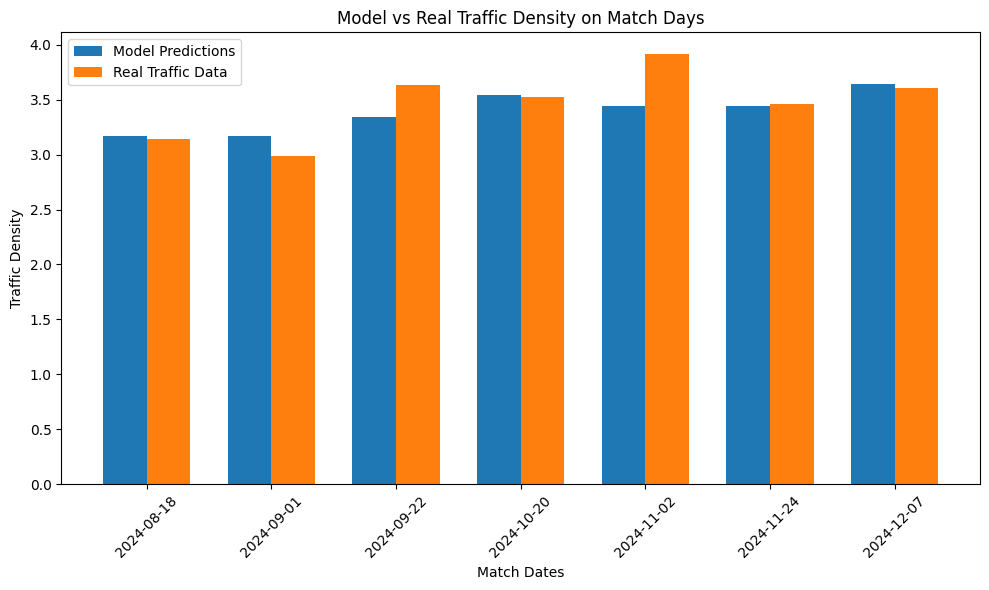

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Load traffic dataset
data_path = 'data/besiktas_stadium_area_10km.csv'
df = pd.read_csv(data_path)

# Load match days dataset
match_data_path = 'data/bjkmatches.csv'
fb_matches = pd.read_csv(match_data_path)

# Convert date columns to datetime format
df['datetime'] = pd.to_datetime(df['DATE_TIME'])
fb_matches['match_date'] = pd.to_datetime(fb_matches['DATE'], dayfirst=True)

# Convert 'derby' column to binary
fb_matches['derby_binary'] = fb_matches['derby'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Manually define match times
manual_match_times = [21.75, 21.75, 20, 16, 19, 19, 19]  # Hours in decimal format (e.g., 21.75 = 21:45)
fb_matches['match_time'] = manual_match_times

# Define national holidays
national_holiday_classes = {
    '2024-10-29': 1,  # 29 October
    '2024-08-30': 1,  # 30 August
    '2024-04-23': 1,  # 23 April
    '2024-05-19': 1   # 19 May
}

# Calculate average traffic density for each match date
match_avg_traffic = {
    date: df[df['datetime'].dt.date == date]['traffic_density'].mean()
    for date in fb_matches['match_date'].dt.date
}

# Model implementation
# Adjusting is_national_holiday before using it in the model
model_values = []
real_values = []
match_dates = []

for date, is_derby, match_time in zip(fb_matches['match_date'].dt.date, fb_matches['derby_binary'], fb_matches['match_time']):
    is_weekend = 1 if date.weekday() >= 5 else 0
    is_weekday = 1 if date.weekday() < 5 else 0
    is_national_holiday = 1 if str(date) in national_holiday_classes else 0

    # Match time effect: +(22 - match_time) * 0.05
    match_time_effect = max(0, (22 - max(match_time, 18) - 0.25)) * 0.1

    # Calculate model value
    model_value = 3.84 - is_weekend * 0.67 + is_weekday * 0.27 - is_national_holiday * 0.9 + is_derby * 0.2 + match_time_effect
    model_values.append(model_value)

    # Retrieve real traffic value
    real_value = match_avg_traffic.get(date, np.nan)
    real_values.append(real_value)

    match_dates.append(date)

# Evaluate the model
real_values_np = np.array(real_values)
model_values_np = np.array(model_values)

# Calculate R-squared and Mean Squared Error
r_squared = r2_score(real_values_np, model_values_np)
mse = mean_squared_error(real_values_np, model_values_np)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

# Create a bar chart for model vs real values
x = np.arange(len(match_dates))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, model_values, width, label='Model Predictions')
rects2 = ax.bar(x + width/2, real_values, width, label='Real Traffic Data')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Match Dates')
ax.set_ylabel('Traffic Density')
ax.set_title('Model vs Real Traffic Density on Match Days')
ax.set_xticks(x)
ax.set_xticklabels(match_dates, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()


R-squared: 0.8998848196498107
Mean Squared Error: 0.044867252917191056


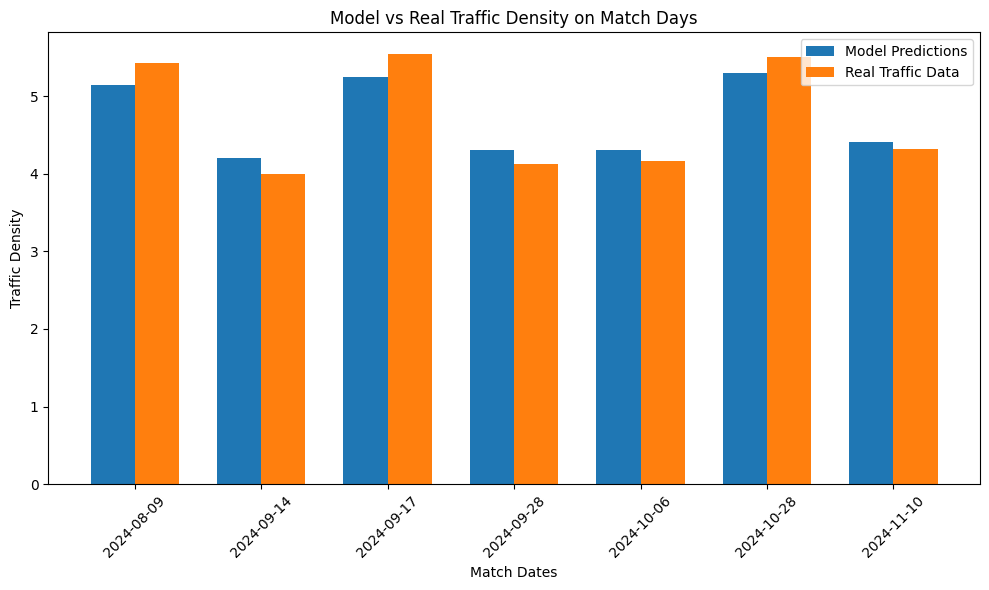

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Load traffic dataset
data_path = 'data/galatasaray_stadium_area_10km.csv'
df = pd.read_csv(data_path)

# Load match days dataset
match_data_path = 'data/gsmatches.csv'
fb_matches = pd.read_csv(match_data_path)

# Convert date columns to datetime format
df['datetime'] = pd.to_datetime(df['DATE_TIME'])
fb_matches['match_date'] = pd.to_datetime(fb_matches['DATE'], dayfirst=True)

# Convert 'derby' column to binary
fb_matches['derby_binary'] = fb_matches['derby'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Manually define match times
manual_match_times = [21, 20, 20, 19, 19, 20, 16]  # Hours in decimal format (e.g., 21.75 = 21:45)
fb_matches['match_time'] = manual_match_times

# Define national holidays
national_holiday_classes = {
    '2024-10-29': 1,  # 29 October
    '2024-08-30': 1,  # 30 August
    '2024-04-23': 1,  # 23 April
    '2024-05-19': 1   # 19 May
}

# Calculate average traffic density for each match date
match_avg_traffic = {
    date: df[df['datetime'].dt.date == date]['traffic_density'].mean()
    for date in fb_matches['match_date'].dt.date
}

# Model implementation
# Adjusting is_national_holiday before using it in the model
model_values = []
real_values = []
match_dates = []

for date, is_derby, match_time in zip(fb_matches['match_date'].dt.date, fb_matches['derby_binary'], fb_matches['match_time']):
    is_weekend = 1 if date.weekday() >= 5 else 0
    is_weekday = 1 if date.weekday() < 5 else 0
    is_national_holiday = 1 if str(date) in national_holiday_classes else 0

    # Match time effect: +(22 - match_time) * 0.05
    match_time_effect = max(0, (22 - max(match_time, 18) - 0.25)) * 0.1

    # Calculate model value
    model_value = 4.5 - is_weekend * 0.47 + is_weekday * 0.57 - is_national_holiday * 0.9 + is_derby * 0.05 + match_time_effect
    model_values.append(model_value)

    # Retrieve real traffic value
    real_value = match_avg_traffic.get(date, np.nan)
    real_values.append(real_value)

    match_dates.append(date)

# Evaluate the model
real_values_np = np.array(real_values)
model_values_np = np.array(model_values)

# Calculate R-squared and Mean Squared Error
r_squared = r2_score(real_values_np, model_values_np)
mse = mean_squared_error(real_values_np, model_values_np)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

# Create a bar chart for model vs real values
x = np.arange(len(match_dates))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, model_values, width, label='Model Predictions')
rects2 = ax.bar(x + width/2, real_values, width, label='Real Traffic Data')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Match Dates')
ax.set_ylabel('Traffic Density')
ax.set_title('Model vs Real Traffic Density on Match Days')
ax.set_xticks(x)
ax.set_xticklabels(match_dates, rotation=45)
ax.legend()

fig.tight_layout()
plt.show()
